In [1]:
import pandas as pd
import numpy as np
from os import listdir

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import CenteredNorm
%matplotlib inline

In [3]:
from sklearn import metrics
from scipy import stats

In [4]:
def merge_results_frames(df,df2):
    for idx,r in df.iterrows():
        g = r['gamma']
        p = r['bias']
        for col in df.columns:
            if col == 'gamma' or col == 'bias':
                continue
            df.loc[(df['gamma']==g) & (df['bias']==p),col]+=df2.loc[(df2['gamma']==g) & (df2['bias']==p),col]

def str2list(strarray):
    return [float(x) for x in strarray.strip('[] ').split()]

def df_str2list(df):
    for col in df.columns:
        if col == 'gamma' or col == 'bias':
            continue
        df[col] = df[col].apply(str2list)

In [5]:
results_dir='Results/'

resdict = {}
first = True
for filename in listdir(results_dir):
    if first:
        df = pd.read_csv(results_dir+filename)
        df_str2list(df)
        first = False
    else:
        df2 = pd.read_csv(results_dir+filename)
        df_str2list(df2)
        merge_results_frames(df,df2)

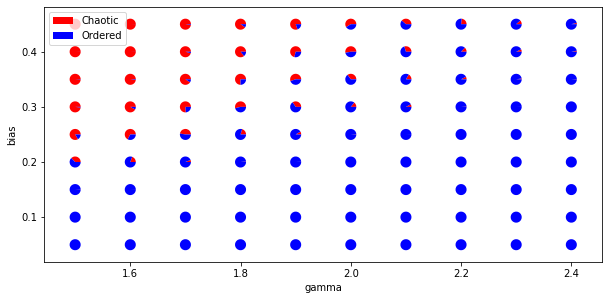

In [6]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
varx = 'gamma'
vary = 'bias'
for _,row in df.iterrows():
    x = np.mean(row[varx])
    y = np.mean(row[vary])
    ones = np.mean([derrida > 1 for derrida in row['Derrida']])
    ax.pie([ones, 1-ones], center=(x, y), radius=0.01, colors=['r', 'b'], frame=True)
    ones = [derrida > 1 for derrida in row['Derrida']]
    

legend_elements = [Patch(facecolor='r', label='Chaotic'), Patch(facecolor='b', label='Ordered')]
plt.xlabel(varx)
plt.ylabel(vary)
ax.legend(handles=legend_elements, loc='best')

In [84]:
dictall = {}
for _,row in df.iterrows():
    for col in df.columns:
        if col in ['gamma','bias']:
            rowlist = [row[col]]*len(row['Derrida'])
        else:
            rowlist = row[col]
        if col in dictall:
            dictall[col] += rowlist
        else:
           dictall[col] = rowlist.copy()
           
dfall = pd.DataFrame(dictall)

dfall['entropy'] = -(dfall['bias']*np.log2(dfall['bias']))-((1-dfall['bias'])*np.log2(1-dfall['bias']))
dfall['entropy'] = -(dfall['bias']*np.log(dfall['bias']))-((1-dfall['bias'])*np.log(1-dfall['bias']))
dfall['variance'] = dfall['bias']*(1-dfall['bias'])

dfall['avgS']=dfall['avgKe']-dfall['avgKc']
dfall['avgSe']=3.33*dfall['avgKe']*dfall['variance']
dfall['avgSk']=2*dfall['avgK']*dfall['variance']
dfall['regime']=(dfall['Derrida']>1).astype(int) - (dfall['Derrida']<1).astype(int)
dfall['bve']=dfall['avgSe']/(2*dfall['avgK'])
dfall['avgSe_sample']=3.33*dfall['avgKe']*dfall['bve']
dfall['avgKe_ent']=dfall['avgKe']*dfall['entropy']
dfall=dfall.sample(frac = 1)
dfall

,gamma,bias,Derrida,avgK,medK,avgKe,medKe,avgKc,medKc,entropy,variance,avgS,avgSe,avgSk,regime,bve,avgSe_sample,avgKe_ent
6469,1.6,0.40,1.279,2.57,2.0,1.687289,1.0,0.419311,0.0,0.673012,0.2400,1.267979,1.348482,1.23360,1,0.262351,1.474062,1.135565
10167,1.7,0.45,1.176,2.39,1.0,1.575298,1.0,0.386475,0.0,0.688139,0.2475,1.188823,1.298321,1.18305,1,0.271615,1.424824,1.084024
16365,1.9,0.30,0.887,2.08,1.0,1.162193,1.0,0.310957,0.0,0.610864,0.2100,0.851235,0.812721,0.87360,-1,0.195366,0.756085,0.709942
14630,1.9,0.10,0.433,2.56,1.0,0.936868,0.0,0.495275,0.0,0.325083,0.0900,0.441593,0.280779,0.46080,-1,0.054840,0.171087,0.304560
12501,1.8,0.30,1.048,2.28,1.0,1.369446,1.0,0.349861,0.0,0.610864,0.2100,1.019585,0.957653,0.95760,1,0.210012,0.957707,0.836546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30544,2.3,0.35,0.711,1.54,1.0,0.844660,1.0,0.112629,0.0,0.647447,0.2275,0.732031,0.639893,0.70070,-1,0.207758,0.584363,0.546872
7617,1.7,0.10,0.676,2.92,2.0,1.347246,1.0,0.695923,0.0,0.325083,0.0900,0.651323,0.403770,0.52560,-1,0.069139,0.310179,0.437967
7073,1.7,0.05,0.254,2.78,2.0,0.819287,0.0,0.558887,0.0,0.198515,0.0475,0.260400,0.129591,0.26410,-1,0.023308,0.063589,0.162641
26652,2.2,0.30,0.762,1.79,1.0,1.005838,1.0,0.225198,0.0,0.610864,0.2100,0.780640,0.703382,0.75180,-1,0.196475,0.658083,0.614430


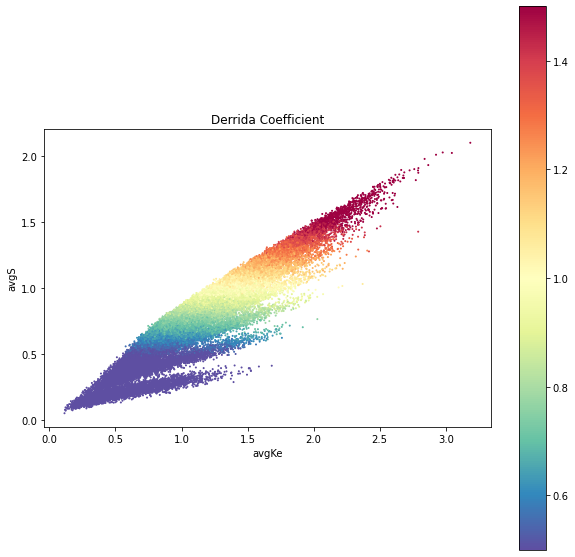

In [8]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgKe'
vary = 'avgS'
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.show()

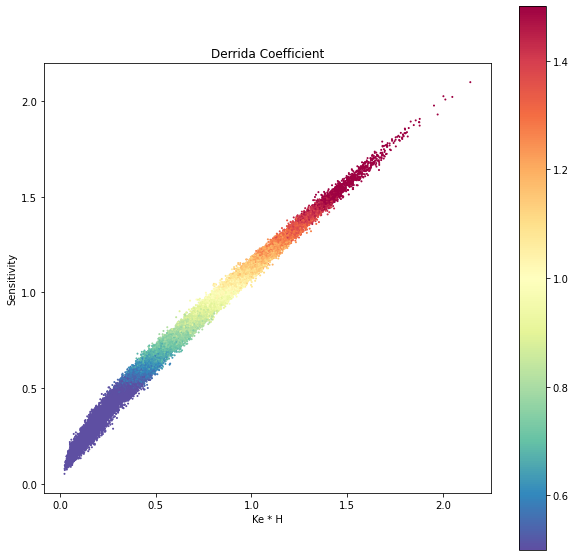

In [85]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall['avgKe_ent'],dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_xlim((0,5))
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("Ke * H")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

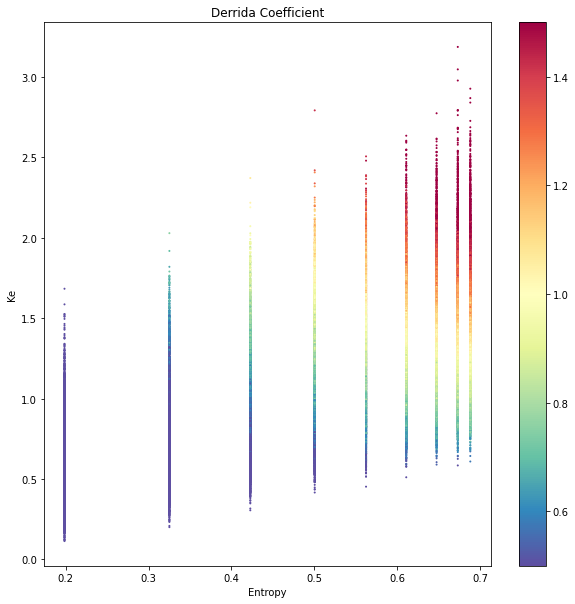

In [86]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall['entropy'],dfall['avgKe'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("Entropy")
plt.ylabel("Ke")
plt.title('Derrida Coefficient')
plt.show()

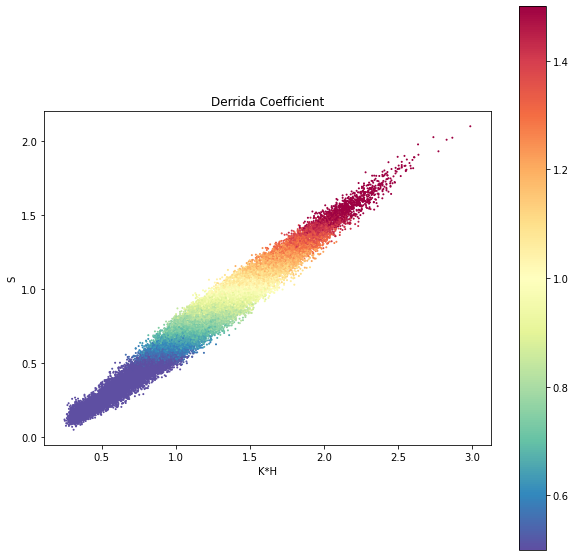

In [87]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall['avgK']*(dfall['avgKe_ent']/dfall['avgKe']), dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_xlim((0,5))
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("K*H")
plt.ylabel("S")
plt.title('Derrida Coefficient')
plt.show()

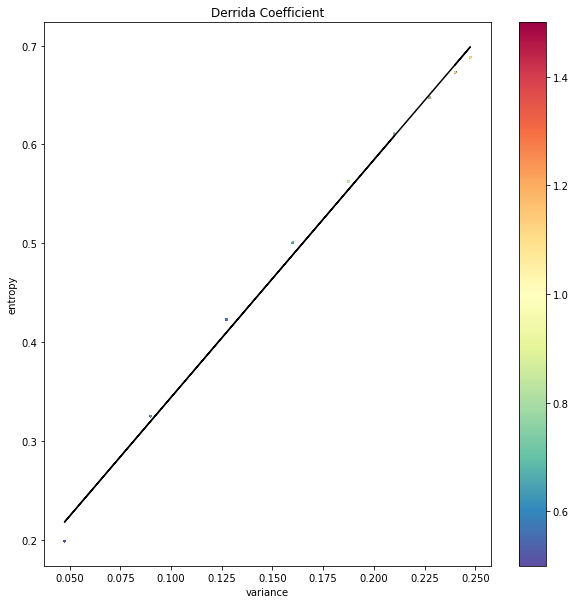

In [88]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall['variance'],dfall['entropy'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)

linear_model=np.polyfit(dfall['variance'],dfall['entropy'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(dfall['variance'],linear_model_fn(dfall['variance']),color="black")

#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("variance")
plt.ylabel("entropy")
plt.title('Derrida Coefficient')
plt.show()

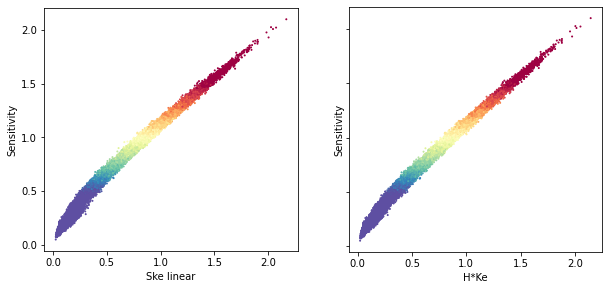

In [89]:
fig, ax = plt.subplots(1,2,sharey='row',figsize=(10, 10),facecolor='white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax[0].scatter(dfall['avgKe']*linear_model_fn(dfall['variance']),dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax[0].set_aspect('equal', 'box')
ax[0].set_xlabel("Ske linear")
ax[0].set_ylabel("Sensitivity")

sc=ax[1].scatter(dfall['avgKe_ent'],dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax[1].set_aspect('equal', 'box')
ax[1].set_xlabel("H*Ke")
ax[1].set_ylabel("Sensitivity")
#plt.title('Derrida Coefficient')
plt.show()

In [124]:
dfall_trim = dfall.sample(frac=1.0)


m,b,r,p,s=stats.linregress(dfall_trim['variance'],dfall_trim['entropy'])
print('V-H:  ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgS'],dfall_trim['Derrida'])
print('S-d:  ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgKe_ent'],dfall_trim['Derrida'])
print('HKe-d:',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

mVH,bVH,_,_,_=stats.linregress(dfall_trim['variance'],dfall_trim['entropy'])
m,b,r,p,s=stats.linregress(dfall_trim['avgKe']*(mVH*dfall_trim['variance']+bVH),dfall_trim['Derrida'])
print('LKe-d:',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgK']*dfall_trim['entropy'],dfall_trim['Derrida'])
print('HK-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgK']*(mVH*dfall_trim['variance']+bVH),dfall_trim['Derrida'])
print('LK-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgSe'],dfall_trim['Derrida'])
print('Se-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgSk'],dfall_trim['Derrida'])
print('Sk-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(((dfall_trim['avgK']+dfall_trim['avgKe'])/2)*dfall_trim['entropy'],dfall_trim['Derrida'])
print('Sk-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')


V-H:   r**2 = 0.9958508089015544,	m = 2.4044182468962596,	b = 0.1035236933232977,	p = 0.0,	s = 0.0008284254051155697
S-d:   r**2 = 0.9940370519898918,	m = 1.0000997621303525,	b = 0.0001134165099168083,	p = 0.0,	s = 0.00041345796640598404
HKe-d: r**2 = 0.9835650238565496,	m = 0.9751590574015214,	b = 0.15379442023025003,	p = 0.0,	s = 0.0006728484786695559
LKe-d: r**2 = 0.9803796119525594,	m = 0.9662182654223386,	b = 0.1596258056491956,	p = 0.0,	s = 0.0007296099013367836
HK-d:  r**2 = 0.9646396500513202,	m = 0.773794624703716,	b = -0.1262281081693718,	p = 0.0,	s = 0.0007907883204971112
LK-d:  r**2 = 0.9671780792370814,	m = 0.7759010893953835,	b = -0.12867223590237564,	p = 0.0,	s = 0.0007629462640746569
Se-d:  r**2 = 0.9780022711371462,	m = 0.7921252161348138,	b = 0.20649327740766277,	p = 0.0,	s = 0.0006341202826594634
Sk-d:  r**2 = 0.9773025154268706,	m = 0.9998019153688112,	b = 0.00031065867592849905,	p = 0.0,	s = 0.0008132931905524658
Sk-d:  r**2 = 0.97799199337539,	m = 0.86730045653738

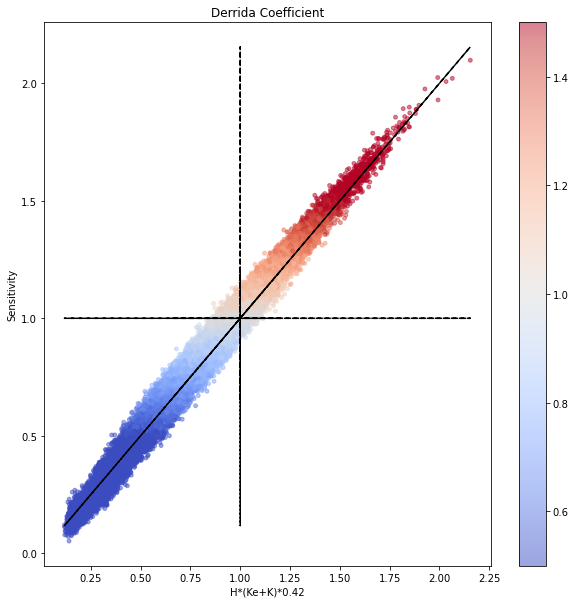

In [141]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')
x=.42*(dfall['avgKe']+dfall['avgK'])*dfall['entropy']
sc=ax.scatter(x,dfall['avgS'],s=15,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=0.5)
ax.plot(x,x,'k--')
ax.plot(x,x/x,'k--')
ax.plot(x/x,x,'k--')
#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("H*(Ke+K)*0.42")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

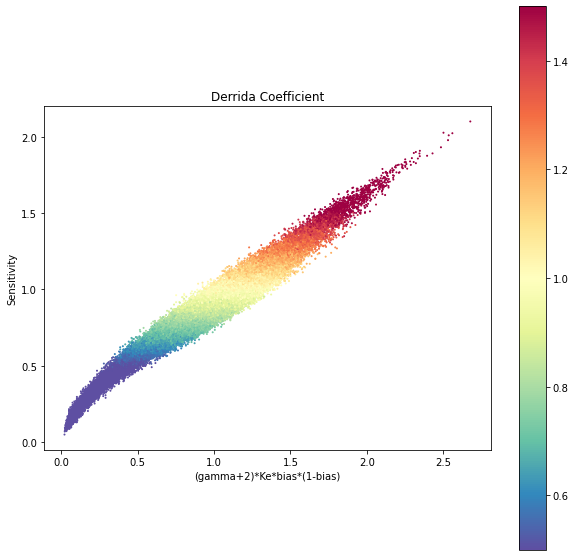

In [15]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter((dfall['gamma']+2)*dfall['avgKe']*dfall['bias']*(1-dfall['bias']),dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("(gamma+2)*Ke*bias*(1-bias)")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

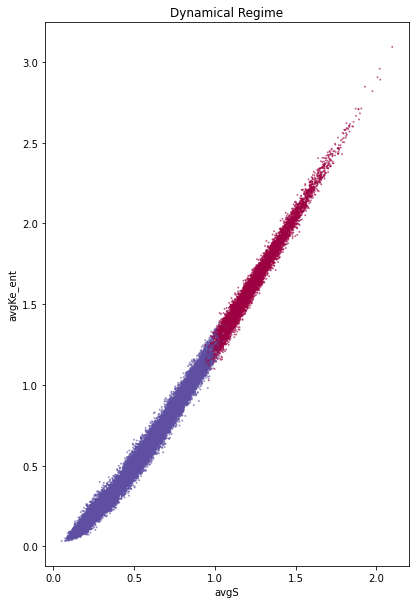

In [16]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgS'
vary = 'avgKe_ent'
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['regime'],cmap=cmap,norm=CenteredNorm(vcenter=0,halfrange=1.0),alpha=0.5)
ax.set_aspect('equal', 'box')
plt.xlabel(varx)
plt.ylabel(vary)
plt.title("Dynamical Regime")
plt.show()

In [17]:
max([(np.mean(dfall['regime']==((dfall['avgSk']*scale>1).astype(int)-(dfall['avgSk']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9606837606837607, 1.0014999999999448)

In [18]:
max([(np.mean(dfall['regime']==((dfall['avgSe_sample']*scale>1).astype(int)-(dfall['avgSe_sample']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9618518518518518, 0.9929999999999457)

In [19]:
max([(np.mean(dfall['regime']==((dfall['avgSe']*scale>1).astype(int)-(dfall['avgSe']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9676923076923077, 0.9979999999999452)

In [20]:
max([(np.mean(dfall['regime']==((dfall['avgS']*scale>1).astype(int)-(dfall['avgS']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9785754985754985, 1.0019999999999447)

In [21]:
print(max([(np.mean(dfall['regime']==((dfall['avgKe_ent']*scale>1).astype(int)-(dfall['avgKe_ent']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)]))
print(max([(np.mean(dfall['regime']==((dfall['avgKe_ent']*scale>1).astype(int)-(dfall['avgKe_ent']*scale<1).astype(int))),scale) for scale in [1]]))

(0.9725925925925926, 0.8109999999999657)
(0.846039886039886, 1)


In [22]:
regime_truth = dfall['regime']
regime_S = ((dfall['avgS']>1).astype(int)-(dfall['avgS']<1).astype(int))
regime_Se = ((dfall['avgSe']>1).astype(int)-(dfall['avgSe']<1).astype(int))
regime_Sk = ((dfall['avgSk']>1).astype(int)-(dfall['avgSk']<1).astype(int))
regime_Ke_ent = ((dfall['avgKe_ent']*0.811>1).astype(int)-(dfall['avgKe_ent']*0.811<1).astype(int))

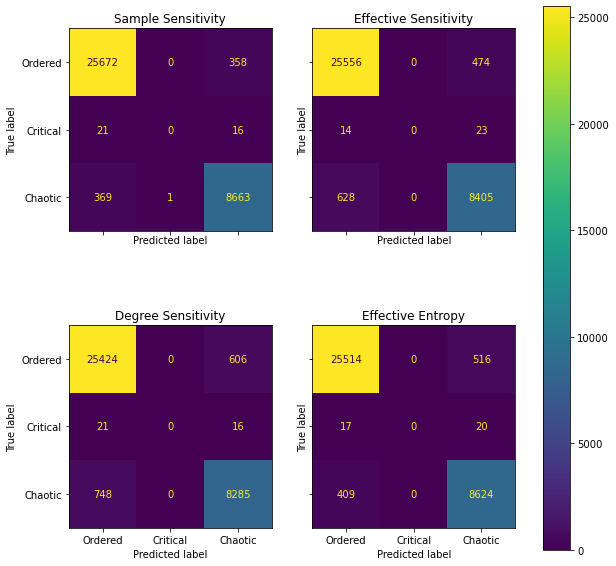

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey='row', sharex='col', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0,0])
cm_display.im_.colorbar.remove()
ax[0,0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0,1])
cm_display.im_.colorbar.remove()
ax[0,1].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1,0])
cm_display.im_.colorbar.remove()
ax[1,0].set_title('Degree Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Ke_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1,1])
cm_display.im_.colorbar.remove()
ax[1,1].set_title('Effective Entropy')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()

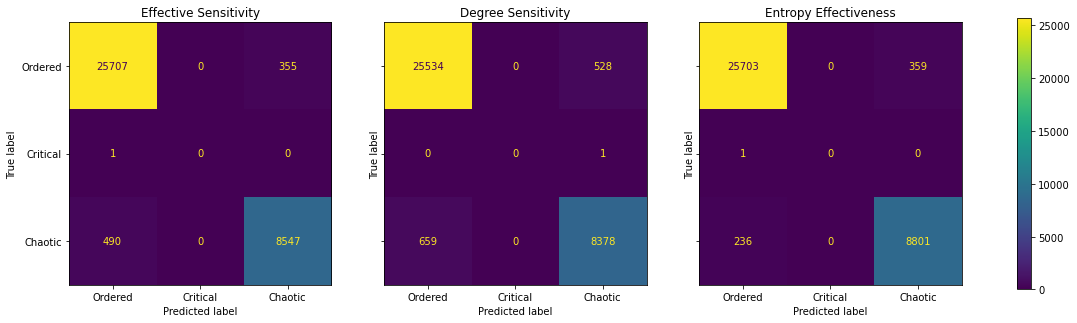

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey='row', facecolor='white')


confusion_matrix = metrics.confusion_matrix(regime_S, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_S, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Degree Sensitivity')


confusion_matrix = metrics.confusion_matrix(regime_S, regime_Ke_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[2])
cm_display.im_.colorbar.remove()
ax[2].set_title('Entropy Effectiveness')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()

Text(0.5, 1.0, 'Entropy Effective Degree')

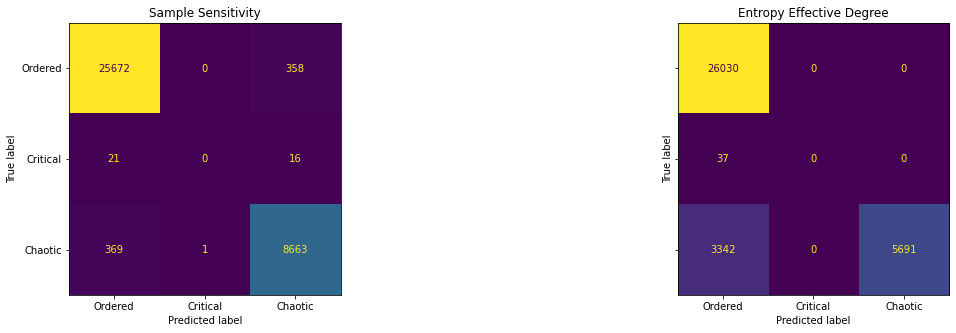

In [25]:
p = dfall['bias']
q = 1-dfall['bias']
pfunc = -(p*np.log(p))-(q*np.log(q))
pfunc*dfall['avgKe']
regime_ent = ((pfunc*dfall['avgKe']>1).astype(int)-(pfunc*dfall['avgKe']<1).astype(int))

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey='row', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Entropy Effective Degree')